## An Introduction to Neural networks

Neural networks (NNs) and particularly a subset of neural networks (deep neural networks; DNNs) have become the poster child of modern AI due to its recent booming success in solving a multitude of complex problems, such as beating the world's GO champion, facilitating self-driving cars and much more. Here you will learn the basics of neural networks through interactive code in simple python (it's easier than it sounds!). This notebook introduces neural networks in general.

### So what is a neural network? 
We can try to answer that by considering the simplest NN possible: the <b>perceptron</b>, which strictly speaking only consists of a single neuron.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

#### The Perceptron
Borrowing language from neuroscience, we speak of artificial neurons and their synapses (more often referred to as <b>weights</b>). A perceptron is a single neuron, taking one or more inputs, and returning exactly one output (See Figure below). 

Just like biological neural networks, the perceptron integrates signals from incoming synapses (adding together the parts). If this sum reaches a given threshold (referred to as the bias), the neuron fires, otherwise it does nothing. We represent this output as 1 (fires) or 0 (doesn't fire). This all-or-nothing behaviour is facilitated in the <b>axon hillock</b> in the biological neuron, and is implemented as a step function <b>h(x)</b> in the artificial one.

Although the artificial neuron is a massive abstraction of the biological one, it has enough of the properties necessary to exhibit very interesting behaviour.

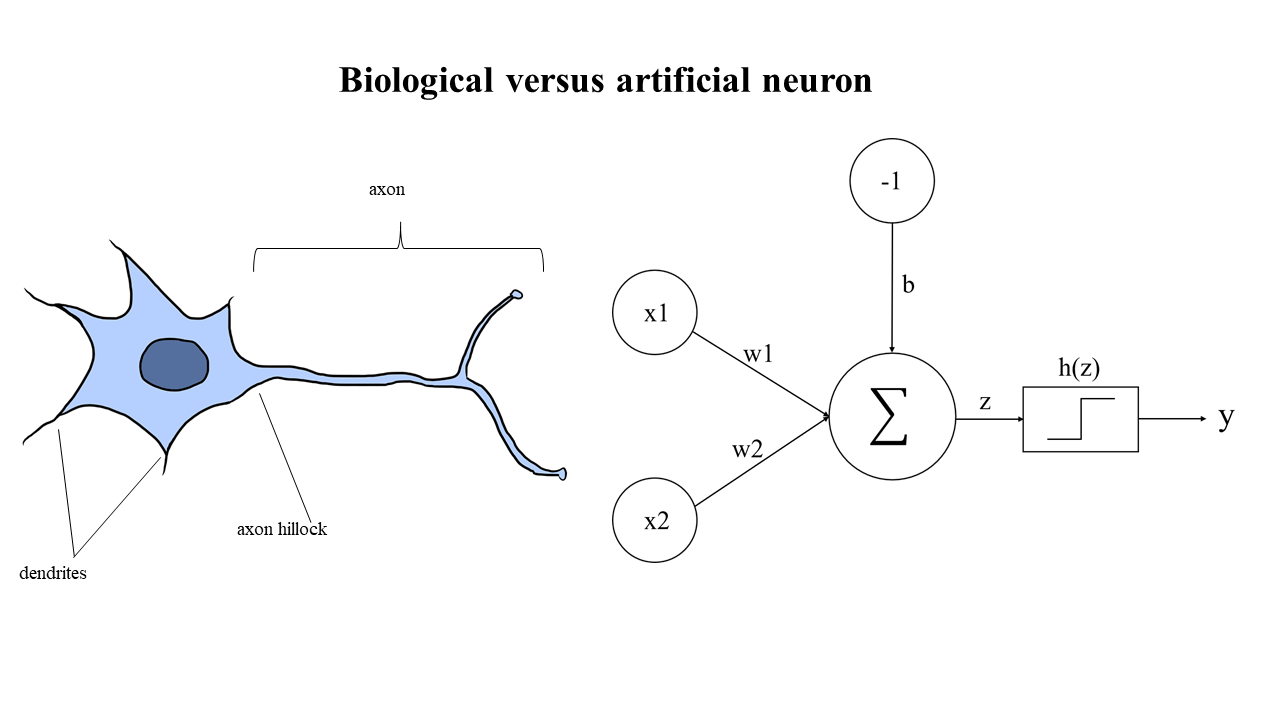

In [2]:
from IPython.display import Image
Image(filename='./assets/neuron_artificial_biological.png', width=800)

Formally, what the figure says is that the output of an artificial neuron is simply the sum of its inputs multiplied by their respective synapse weights (plus a bias)
        
$$ Z = x_1  w_1 +  x_2 w_2 + b = \sum_{i=1}^N(x_i w_i) + b$$ 

followed by an activation function

$$ h(X) =
    \begin{cases}
      1, & \text{if}\ X>0 \\
      0, & \text{if}\ X\leq0 \\
    \end{cases} $$

So in total we have

$$ y = h(Z) $$

<b>Remark:</b> adding the bias term is equivalent to setting an activation threshold to b instead of 0. 
        
So all the neuron does is to take some inputs, add them together, and deciding whether the inputs are strong enough to activate or not. To illustrate how simple this actually is, we will implement a minimalistic perceptron in Python!

In [3]:
def activation(x, threshold):
    if x >= threshold: return 1
    else: return 0


def perceptron(inputs, weights, b):
    """
    inputs  : The values in the input neurons (list)
    weights : The weights connecting n1 and n2 to the output neuron (list)
    b       : The threshold below which the postsynaptic neuron won't fire (number)
    """
    in1, in2 = inputs
    w1, w2 = weights
    s = in1*w1 + in2*w2
    return activation(s, b)

Simple right? Now, see if you can do the following: 
#### Ex1.a) Modify `perceptron` as to take 3 instead of 2 inputs.  b) (optional) Make the perceptron take an arbitrary number of inputs. (However, remember to change it back before continuing to execute the cells in this notebook!).


In [7]:
#### Your code here

In [8]:
#uncomment for solution
#%load solutions/ex1_1.py

So what's so special about this artificial neuron? Suppose we have the following dataset from a fishing trip, by recording the weight and length for cod and haddock. We represent the class as either a 1 (cod) or 0 (haddock).

In [9]:
import pandas as pd
df = pd.DataFrame({"Weight":[1.4, 1.6, 1.6, 2,  1.4,  1.35, 1.5,  1.7], 
                   "Length":[.6,  .4,  .7,  .6,  .5,   .35, .25, 0.7], 
                   "Class" :[0,    1,  0,  1,    0,     1,   1,   0]})
df

,Weight,Length,Class
0,1.40,0.60,0
1,1.60,0.40,1
2,1.60,0.70,0
3,2.00,0.60,1
4,1.40,0.50,0
5,1.35,0.35,1
6,1.50,0.25,1
7,1.70,0.70,0


<b>Pro tip</b>: Always visualize your data before running a machine learning model.

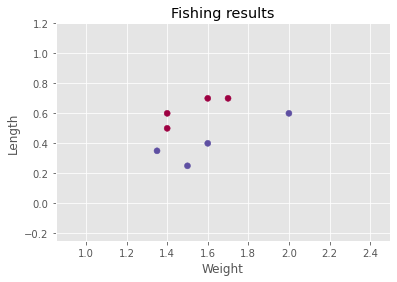

In [10]:
from matplotlib import pyplot as plt

# Define the figure boundaries
X = df.drop(labels=["Class"], axis=1).values
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Draw a scatter plot of the weight and length of the fishes
plt.scatter(x= df.Weight, y = df.Length, c = df.Class, cmap=plt.cm.Spectral)
plt.xlabel("Weight"); plt.ylabel("Length")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Fishing results")

plt.show()

Is it possible for our perceptron to learn the difference between the cod and the haddock? The function below lets you plot the predicted output of the perceptron over all (weight, length)-pairs. (You are not expected to understand how the plotting function is implemented!).

In [11]:
# Modified from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-download-auto-examples-neighbors-plot-classification-py

def plot_decision(clf, X, y, weights, b, h=0.01):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Make a prediction for every (weight, length) pair
    Z = list(map(lambda x: clf(x, weights, b), np.c_[xx.ravel(), yy.ravel()]))
    Z = np.array(Z).reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [12]:
# We split the data into the features X and the target y
X = df.drop(["Class"], axis=1).values 
y = df.Class.values

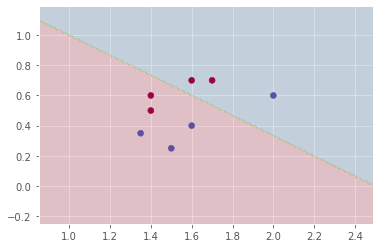

In [13]:
weights = [.4, .6]
b = 1

plot_decision(perceptron, X, y, weights=weights, b=b)

The transparent background is the perceptron's prediction. However, we selected our weights arbitrarily, so the above prediction is completely wrong. However, it should be possible to find a set of weights so that it will successfully seperate the red from the blue dots.

#### Ex.2 a) Try to change the weights and the threshold b, and see how it affects the decision boundary. b) Change the parameters such that it properly separates the red and the blue dots.

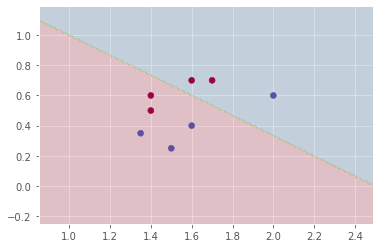

In [14]:
## your code here

plot_decision(perceptron, X, y, weights, b)

Now, you should be convinced it is not scalable or useful to manually fiddle with the parameters, but we want the perceptron to learn its own weights by itself. How is this achieved? Well we need to update the weights based on the performance of the perceptron. The performance can be captured as the error:
#### Error = target value - predicted value = $ y - \hat y $

So if our prediction is lower then the target, we want our prediction to be higher. This is achieved by increasing the weight from the synapses in the case of a positive input and decreasing the weight if the input is negative. On the other hand, if the prediction is larger than the desired target, we do the opposite. This leads to the update rule:

#### $$ W \leftarrow W + \eta  (Y - \hat Y) X, $$
where $\eta$ is the learning rate - to control how much we want to change the weights in each iteration. Notice that we multiply by $X$ to correct for the sign (+ or -).

#### The function `train` implements this update rule. However,something is missing. 

#### Ex3. Add the code necessary for it to work. (The [cell below](#another_cell) will throw an error message if the code in `train` is incorrect).




In [15]:
perceptron(X[0], [1,1], .2)

1

In [1]:
def train(clf, X, y, weights, bias, learning_rate=0.1):
    """
    Performs stochastic gradient descent for one epoch.
    
    Parameters
    -----------------------------
    clf : the perceptron function
    X : input samples
    y : input target values
    weights : list of parameters
    bias : bias term
    learning_rate : learning rate
    
    Output
    -----------------------------
    w1 : the first weight after training 
    w2 : the second weight
    b : the bias 
    """
    b = bias
    w1, w2 = weights
    for x_i, target in zip(X, y):
        
        pred = perceptron(x_i, [w1, w2], b)
        
        ## ADD YOUR CODE HERE
        
        
        w1 +=  learning_rate * error * x_i[0]
        w2 +=  learning_rate * error * x_i[1]
        b -=  learning_rate * error
    
    return w1, w2, b

#### Now we put it to the test

The code below calls `train` 60 times, each time looping through the whole training set <b>X</b>. At each iteration, the error is calculated and used to adjust the weights in the direction necessary to arrive at the right answer.

<a id='another_cell'></a>

In [13]:
# initialize some random weights
w1, w2, b = .6, .1, 1

fig = plt.figure(figsize=(14,10))

epochs=60  # number of epochs
fr=10      # the number of epochs before plotting 

j=0 
for i in range(epochs):

    w1, w2, b = train(perceptron, X, y, [w1, w2], b)
    if i%fr == 0: 
        j += 1
        fig.add_subplot(n/fr/2, 2, j); 
        plt.title(f'epoch = {i+10}')
        plot_decision(perceptron, X, y, [w1, w2], b)

NameError: name 'n' is not defined

<Figure size 1008x720 with 0 Axes>

And voila: the perceptron successfully completes our classification task. 


In summary, we are looping through the whole sample 
Notice how the decision boundary converges as we keep training it, until it reaches a satisfactory result.

<br>
<b>Remark:</b> Perceptrons can take an arbitrary number of inputs, but in the higher dimensional case we will obtain a hyperplane (and not a line) separating the data. In three dimensions this corresponds to a regular plane. 

So just by updating the weights (synapses) of the network in a clever fashion, we can have it do some impressive things. In fact, the perceptron is guaranteed to converge as long as the data is linearly seperable! On the other hand, if the data is non-linear, the perceptron will no longer suffice.

The key to overcoming this problem is to add a hidden layer between the input layer and the output layer, making a multilayer perceptron. We will not implement this by ourselves, but use implementations found in other python libraries, such as `scikit-learn` or `tensorflow`.

#### Ex4. Rerun the code above but change the learning rate from 0.1 to 0.01. How does this affect the plots?

In [14]:
#### Your answer here

#### Ex5. Try to apply the perceptron on a non-linear dataset (provided below). Explain what you see.

In [15]:
#### Your answer here

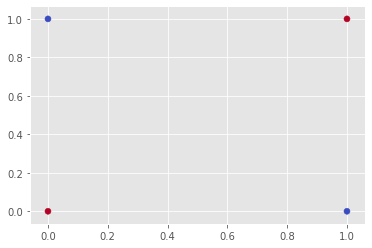

In [16]:
X = np.array([[0,0],
             [0,1],
             [1,0], 
             [1,1]])

y = np.array([1, 0, 0, 1])

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm); plt.show()

# Overcoming linearity

Luckily this caveat is easily overcome by stacking multiple layers after one another. For this to work properly though, we need a non-linear activation function. The most widely used is the ReLU, which is simply keeps the positive values and discounts the negative ones (returns 0 instead).


![relu](assets/relu.png)

#### Ex. 6: implement ReLU (i.e. write a function which takes a number and returns the number if it is positive and 0 if it is negative)

In [ ]:
# %load solutions/ex6.py

In [ ]:
# plot relu here


Inputs-to a model can be represented as a vector (essentially a list) of features. The weights in the neural network also has a natural structural representation: the matrix (or equivalently a table). The output of a layer is just the dot product of the input and weights:

$y = Wx$

In [34]:
W = np.arange(12).reshape(4,3)
x = np.array([1,2,3]) 

In [35]:
print("weights:\n", W); print("\ninput: ", x)

weights:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

input:  [1 2 3]


* The dot product is performed by element-wise multiplication of x broadcasted over each row.
* for this to work, the dimensions of W and x have to match
* [See here for some easy examples](https://www.mathsisfun.com/algebra/matrix-multiplying.html)


In [36]:
# the first element corresponds to 0*8 + 1*2 + 2*3 = 2+6 = 8
np.dot(W,x)

array([ 8, 26, 44, 62])

### Gradient descent: navigating a landscape of error

For multilayered neural networks, the update rule is slightly more complicated, but still undertandable knowing only high school maths. Like above we have to find out whether a given weight should increase or decrease. This is essentially the derivative of the error function with respect to that weight. The complete matrix of derivatives is called the **gradient**. Reducing the error function gradually by applying a suitable update rule is called **gradient descent**. Our goal is to land in a valley, a place of low error.

![title](assets/cost_func_2d_gradient.png)

To understand how we get the gradient, consider the following. The output of a neural network can be thought of a composition of functions, where the output of one layer is passed as input to the next: 
    $$
    y = mse(l2(l1(x)))
    $$
The derivative of the weight w in l1 (layer 1) is then $dy/dw$, which can be found using the chain rule: $dy/dw = dy/dl2 dl2/w$

In [7]:
#def mse(y, y_hat):
#    return .5*(y-y_hat)**2

In [14]:
#def linear(x, w, b):
#    return w@x - b

In [15]:
# has to be modified for arrays
#def relu(x):
#    return x*(x>0)

In [16]:
# the function composition of a two-layer network would look something like this:
#l1 = relu(linear(x), w1, b1)
#l2 = relu(linear(l1), w2, b2)
#l2

In [17]:
# or equivalently but less readable
#linear(relu(linear(x, w1, b1)), w2, b2)

#### Ex.7: provided the mathematical expressions, try to turn them into code in the functions below: 

In [9]:
# what is the derivative of 0.5*x^2?
#def mse_gradient(y, y_hat):
#    return y-y_hat

In [239]:
# Hint:
# we have three derivatives of interest: for the weights themselves, for the bias and for the input.
# y = Wx - b
# dy/dW = x
# dy/db = -1
# dy/dx = w
#
#def linear_gradient(x, w, b):
#    w_grad = x
#    b_grad = np.ones(w.shape[0])
#    i_grad = w
#    return w_grad, b_grad, i_grad

In [10]:
# Hint:
# the gradient for relu is 1 for positive inputs and 0 for non-positive inputs. 
# This is best expressed as a boolean array.
#
#def relu_gradient(x):
#    return (x > 0).astype(int)

In [11]:
#n_units = [10, 8, 8, 2]
#
#matrix_shapes = [(n_units[p], n_units[p+1]) for p in range(len(n_units)-1)]
#
#all_Ws = [np.random.rand(*shape) for shape in matrix_shapes]

Below is a functioning example of a slightly more flexible neural network, which allows you to vary the number of input, hidden and output units. However, this is restricted to a single hidden layer and a particular activation function (relu). There exist great high-level APIs such as Keras and pytorch which have built-in functionalities to let you seamlessly build your own networks. (Also it looks more complicated than it really is).

In [2]:
#class SimpleNeuralNetwork():
#    
#    def __init__(self, n_in, n_hidden, n_out, lr=0.01):
#        #parameters
#        self.W1 = np.random.rand(n_hidden, n_in)
#        self.W2 = np.random.rand(n_out, n_hidden)
#        self.b1 = np.random.rand(n_hidden)
#        self.b2 = np.random.rand(n_out)
#        self.lr = lr
#        
#        for param in [self.W1, self.W2]: print(repr(param));print(param.shape)
#        
#    
#    def forward(self, x, y, update=False):
#        #forward
#        lin1 = linear(x, self.W1, self.b1)
#        l1 = relu(lin1)
#        l2 = linear(l1, self.W2, self.b2)
#        for a in [lin1, l1, l2]: print(a)
#        
#        if not update: return l2
#        # compute gradients -- backward
#        derr_dl2 = mse_gradient(y, l2)
#        dl2_dw2, dl2_db2, dl2_dl1 = linear_gradient(l1, self.W2, self.b2)
#        dl1_dlin1 = relu_gradient(lin1)
#        dlin1_dw1, dlin_1db1, _ = linear_gradient(x, self.W1, self.b1)
#        print(dlin1_dw1.shape); print(dl1_dlin1.shape); print('!')
#     
#        # apply gradient descent using the chain rule
#        for p in [derr_dl2, dl2_dw2, self.W2]: print(p.shape)        
#        
#        dw2 = dl2_dw2 @ derr_dl2
#        
#        self.W2 -= self.lr * np.outer(derr_dl2.T, dl2_dw2)
#        self.b2 -= self.lr * dl2_db2 * derr_dl2
#       # self.W1 -= self.lr * np.outer(derr_dl2, dl2_dw2) * dl1_dlin1 * dlin1_dw1
#       # self.W1 -= self.lr *  derrdl2 * dl2dl1 * np.dot(dl1dlin1.T, dlin1dw1) 
#       # self.b1 -= self.lr * dlin1db1 * dl1dlin1 * dl2dl1  * derrdl2
#        
#        return l2
#    
#    def train(self, data, labels):
#        for x,y in zip(data, labels):
#            y_hat = self.forward(x, y, update=True)
#            print('-------')
#            print(y); print(y_hat)
#            error = mse(y, y_hat)
#            print("error: ", error)   
#                

In [3]:
#testX = np.random.rand(10, 4)*20
#testy = np.random.rand(10, 2)*3
#
#print(testX[0].shape); print(testy[0].shape)

In [4]:
#layers = [testX[0].shape[0], 3, testy[0].shape[0]] # in, hidden, out

In [5]:
#nn = SimpleNeuralNetwork(*layers)

In [424]:
#nn.forward(testX[1], testy[1])

In [6]:
#a = np.array([[1,2,5,6]])
#b = np.array([[1,2,3]])
#print(a.shape, b.shape)
#a.T @ b == np.outer(a, b)

In [7]:
#a.T@a

In [427]:
#t = np.arange(4)
#t.reshape(-1,1).shape

(4, 1)

In [8]:
#nn.train(testX, testy)

# Feed Forward Neural Networks

![FFNN](assets/feed_forward_NN.jpg)

Check [this tensorflow example](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.57506&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to visualize a simple feed forward NN, and [this video series](https://www.youtube.com/watch?v=aircAruvnKk&) for a great explanation of what is going on.

Some important points:
- a forward pass in the NN analogy is equivalent to a matrix multiplication (important for speed and implementations)
- the weight matrices must thus match the layers in size i.e. (rows x cols)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
cm = plt.cm.gray_r

### Case: automatic mail-delivery

One of the precursors to more advanced networks and tasks is to consider the recognition of handwriting. More specifically, can you train a network to distinguish the digits 0-9? This was one of the earliest practical applications for neural networks, and we will go through it here.

In [17]:
data = datasets.load_digits() 
X = data.images
y = data.target

#### Ex.1: How many images do we have?

#### First we visualize our data

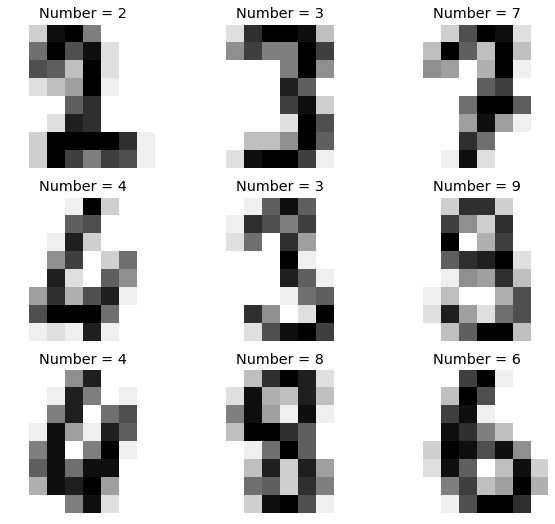

In [18]:
fig = plt.figure(figsize=(10,9))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    i = np.random.randint(0,X.shape[0])
    img = X[i]
    plt.imshow(img, cmap=cm)
    plt.xticks([]); plt.yticks([])
    plt.title(f'Number = {y[i]}')

The resolution here is kept very low as it requires less data resources to work with.

Currently each image is organized into a 8x8 grid. However, the neurons are not aranged spacially in a grid, so we have to 'unroll' the images into a single dimension to match the input layer. This can be achieved using the `reshape` method:

In [184]:
X = X.reshape(1797, 64)
X.shape

(1797, 64)

#### Before training the network, we need to split the data into a training set and a test set. 
It is very important to not evaluate a model on an independent data set (we will see why later). The split is done using `sklearn`'s `train_test_split`.

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Creating a machine learning model. 

The convention in python is to treat the model as an object (an instance of a *class*. A class is just a template  of predefined methods used to create an object). 

In [186]:
clf = MLPClassifier(hidden_layer_sizes=(50,50), random_state=0)

When we create the object, we also specify the network architecture (and other *hyperparameters*). This expample has 2 hidden layers, 50 neurons in each layer. Most of the hyperparameters have a behind the scenes default setting. We say that `clf` is an instance of the the object, MLPClassifier. We can check this with the `type` command.

#### Ex.2: What class is `clf` an instance of?

Each machine learning model in scikit-learn has a set of associated methods. The most important ones are `fit` and `predict`. The `fit` method is what actually trains the model. Once trained, `clf.predict()` can be called to make predictions on unseen samples. 

In [187]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Now that the model has been trained, we can try to make a prediction on a few unseen samples. You are encouraged to rerun this very code a few times and confirm that the network indeed has been properly trained with a high accuracy!

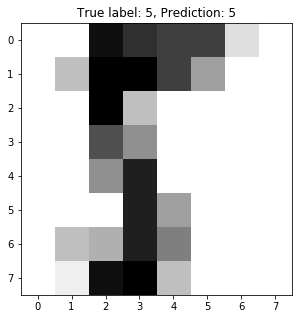

In [188]:
i = np.random.randint(0,10)
img = X_test[i].reshape(8,8) #we need to redo the flatten operation 
pred = clf.predict([X_test[i]])[0]

plt.figure(figsize=(5,5))
plt.imshow(img, cmap=cm)
plt.title(f'True label: {y_test[i]}, Prediction: {pred}')
plt.show()

#### Notice that we make the predictions on `X_test` and not `X_train`.

To get a more proper quantification of the model, we can compute the accuracy: the relationship between the correct predictions and the total number of predictions:

$$ Accuracy = \frac{\text{correct predictions}}{\text{correct predictions + wrong predictions}} = \frac{TP + TN}{TP + FP + TN + FN}$$

In [189]:
accuracy = clf.score(X_test, y_test)

print(f'The model has a test accuracy of {round(accuracy,3)} and a train accuracy of {clf.score(X_train,y_train)}')

The model has a test accuracy of 0.962 and a train accuracy of 1.0


As you can see, the train accuracy is overly optimistic, with a perfect prediction score - this is known as overfitting - the model memorizes specific instances at the cost of generlization. However, the degree of overfitting seen here is not very severe. 

#### Summary so far: with only about 2 lines of code, you can make a neural net, train it on a dataset, and evaluate its performance

### Non-linear seperability
Here we do a slight digression, related to what we learned about the limitations for the perceptron. Unlike the perceptron in `1_Introduction_to_Neural_Networks`, the FFN model is able to learn non-linear relationships. If the digit recognition didn't make this point explicitly enough, we can demonstrate this ability applied to a synthetic dataset.

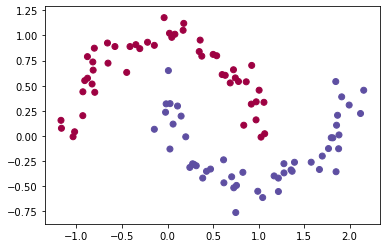

In [190]:
X, y = datasets.make_moons(noise=.1, random_state=1)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.show()

We can train another MLP to distinguish these two crescent moons.

**Note:** *we ignore splitting the data to a train and test set just for simplicity. If this was an actual machine learning task, we would have to do a train-test split.*

In [191]:
clf2 = MLPClassifier((50,50,50))
clf2.fit(X, y)

C:\Users\Peder\Anaconda3\envs\cbm101\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

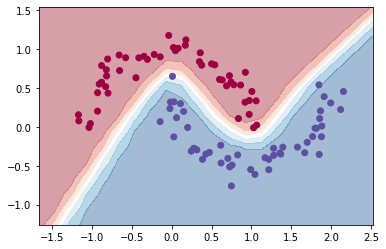

In [192]:
h = 0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = np.array(Z).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

And voila, we have successfully seperated the two classes. It is now made explicit that MLPs can seperate non-linear data, so we can proceed with the MNIST example. 

### More on model evaluation

In principle we could end it at here celebrating a high test accuracy, but it is more interesting to scrutinize the model, seeing *where* it went wrong, how *certain* is it of its own predictions, how much did each epoch of training change the model performance, and other questions. A good place is to plot the predicted classes versus the actual classes in a *confusion matrix*.

In [193]:
X = data.images
y = data.target
class_names = data.target_names

In [194]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = clf.predict(X_test)
print(data.target_names)
print(confusion_matrix(y_test, pred))

[0 1 2 3 4 5 6 7 8 9]
[[36  0  0  1  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  1  0  0  0]
 [ 1  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  0  2  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  3]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 47  1  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  0 46]]


In an ideal confusion matrix, the only non-zero entries are in the diagonal. This one seems to do quite well. But we can visualize it a bit more appealingly:

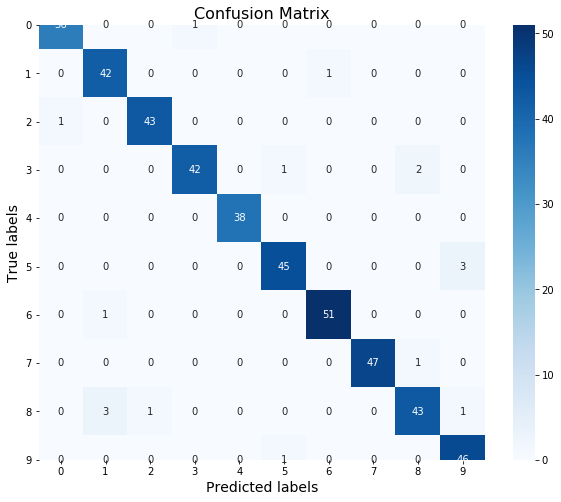

In [195]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(confusion_matrix(y_test, pred), 
            annot = True, 
            fmt = 'g',
            cmap = "Blues",
            ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)
ax.set_title('Confusion Matrix', fontsize = 16) 
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names)
plt.yticks(rotation=0) 
plt.show()

#### Ex.3. Certain numbers are sometimes confused with others (e.g. 8 is predicted as 2 twice). We wish to display these wrongly classified examples. Complete the code below to visualize them. 

*Hint: `np.where` gives you the indeces in an array which satisfies a specified condition. Example: if `A = np.array([-1,1,-2,2,-3,3])`, then `np.where(A > 0)` would return the indeces `1,3,5`*

In [3]:
# %load solutions/ex2_3.py

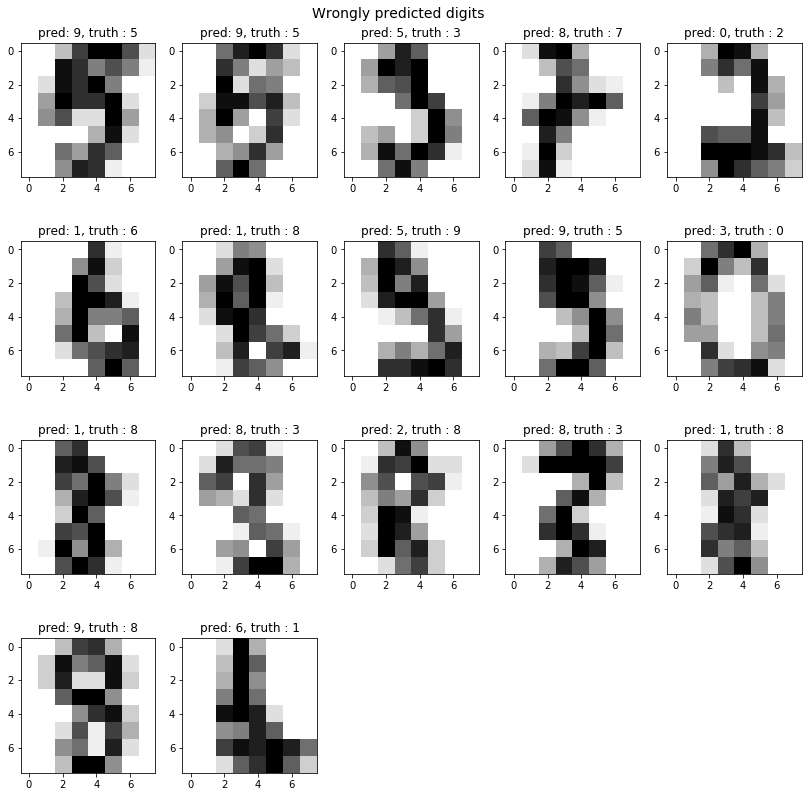

In [196]:
# wrong_pred_idx = YOUR CODE HERE

fig = plt.figure(figsize=(14,14))
plt.suptitle('Wrongly predicted digits', y=.9, fontsize=14)

for (k, i) in enumerate(wrong_pred_idx[0]):
    ax = fig.add_subplot(len(wrong_pred_idx[0])//5+1,5,k+1)
    img = X_test[i].reshape(8,8)
    plt.imshow(img, cmap=cm)
    plt.title(f"pred: {pred[i]}, truth : {y_test[i]}")

Inspecting these examples (especially while considering the low resolution), they are not completely unreasonable mistakes.

The sklearn function `classification report` also supplies a nice summary of the performance, in addition to only the accuracy. 

In [197]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.91      0.98      0.94        43
           2       0.98      0.98      0.98        44
           3       0.98      0.93      0.95        45
           4       1.00      1.00      1.00        38
           5       0.96      0.94      0.95        48
           6       0.98      0.98      0.98        52
           7       1.00      0.98      0.99        48
           8       0.93      0.90      0.91        48
           9       0.92      0.98      0.95        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



### Explanation of the classification report
In addition to accuracy, other metrics like the precision and recall provides additional information. **Precision** is defined as the fraction of predicted positives which are true positives, while **recall** (aka *sensitivity*) is the ability to pick up true positives from the data. You can think of recall as the probability of being correctly diagnosed as sick, given you are indeed sick, and precision as the probability of actually being sick, given you have been diagnosed as such.

$$ Precision = \frac{TP}{TP + FP} =\ "P(sick | diagnosis)"$$

$$ Recall = \frac{TP}{TP + FN} =\ "P(diagnosis | sick)"$$

It should always be a goal to achieve high on both metrics, although you should take into account your specific problem. The **F1-score** is a convenient summary statistic taking both precision and recall into account, and favours balance between them. For instance, it is better for both to be .8 than one to be 1 and the other .6 (although the mean is the same). 

$$ F1-score = \frac{2}{Precision^{-1} + Recall^{-1}} $$

However, you should consider the problem at hand when judging which metric suits you the best. For example, it may be worse to misclassify a cancer patient as healthy than misclassifying a healthy person as sick in some circumstances.

### Classification confidence
We can even inspect the model's confidence of its own predictions. Intuitively we want to trust the model's predictions *more* when it is confident. For instance, imagine the model predicts your likelihood of developing Alzheimer's disorder within the next 10 years based on MRI scans of the brain. How can we know whether or not to trust the model? Well in general, the **confident** predictions are a safer bet. We can find the confidence using the method `predict_proba`. 

In [198]:
pred_prob = clf.predict_proba(X_test)

In [199]:
# some convenience functions

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    img = img.reshape(8,8)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

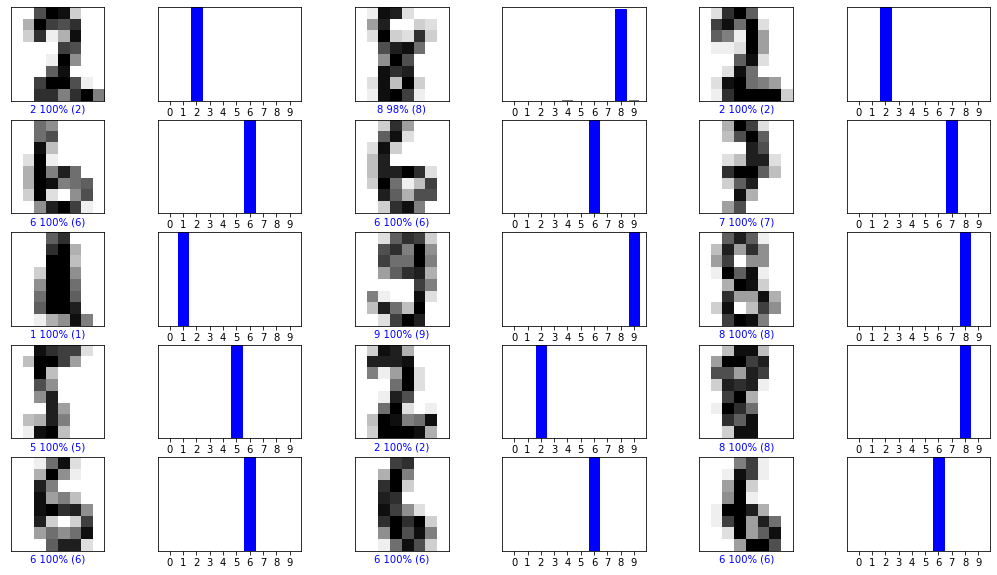

In [200]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred_prob, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred_prob, y_test)
    plt.xticks(np.arange(10))
plt.show()

We can also run the same code for the misclassified examples.

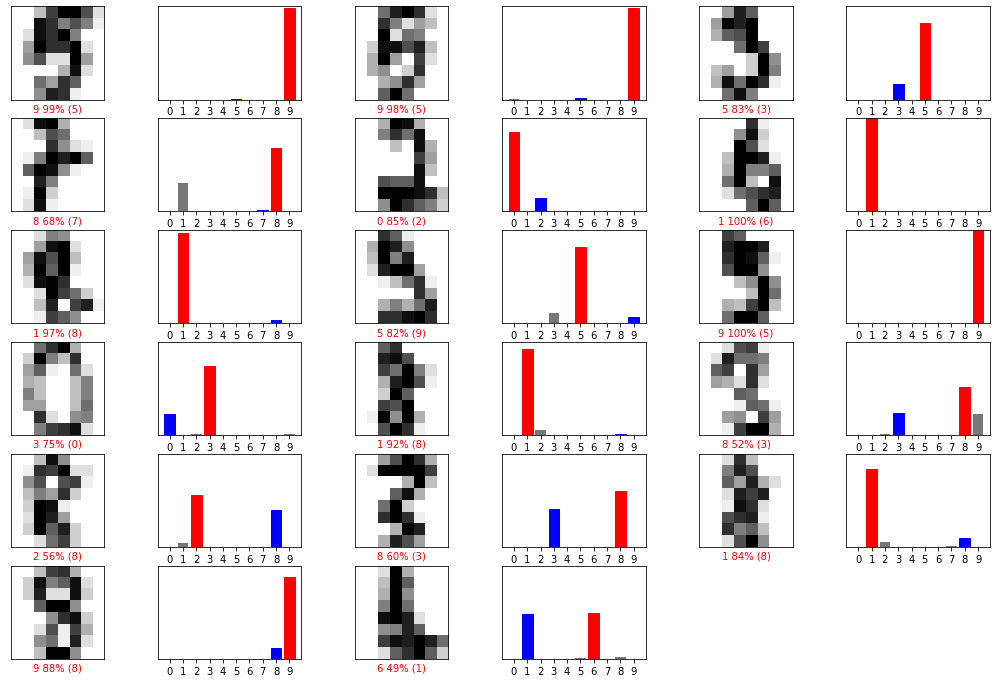

In [203]:
num_rows = len(wrong_pred_idx[0])//3+1
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 2*num_rows))
for i, idx in enumerate(wrong_pred_idx[0]):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(idx, pred_prob, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(idx, pred_prob, y_test)
    plt.xticks(np.arange(10))
plt.show()

When we compare this plot to the one above, we clearly notice that wrongly classified instances are much more characterized by uncertainty from the model. In other words, we can use the uncertainty to our advantage when we put our model out in the real world!

**NB** As a second point, pay attention to *which* other digits the model considers. A lot of the time, it actually considers the true value (blue bars). 

# Convolutional Neural Networks

### Convolutions

Like you have seen on the course edx pages, the basic building block of CNNs is the convolution operation. For 2D (black and white) images, the *kernel* or *filter* is a small grid of numbers (matrix) which is used to detect features in the input image. Luckily, this process is easy to implement and visualize in Python.

![ConvURL](https://upload.wikimedia.org/wikipedia/commons/4/4f/3D_Convolution_Animation.gif "Michael Plotke. CC-BY 3.0")

In [19]:
import numpy as np
from scipy import signal
from scipy import misc
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt

In [20]:
cd = Path.cwd()
fn = cd / "assets" / "harbour.jpg"
if fn.exists(): print(f'File {fn} located.')

img = np.array(Image.open(fn).convert('L')) #converted to grayscale for simplicity

File C:\Users\Peder\Documents\repos\Seili-2020\machine-learning\assets\harbour.jpg located.


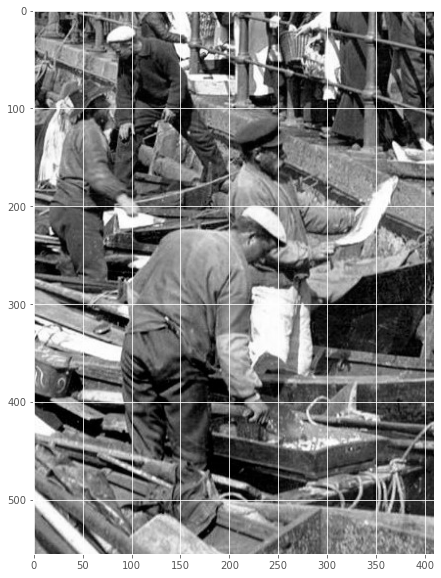

In [21]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.show()

In [22]:
## Uncomment the different kernels and see how they affect the images.

kernel = np.array([[0,0,0],
                   [1,0,-1],
                   [0,0,0]])


#kernel = np.array([[.5,1,.5],
#                   [1,2,1],
#                   [.5,1,.5]])
#
#kernel = np.array([[-1,-1,-1],
#                   [1,1,1],
#                   [0,0,0]])

output = signal.convolve2d(img, kernel, mode='same')

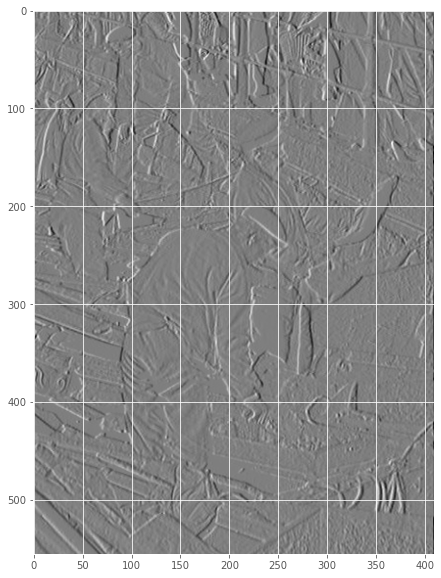

In [25]:
fig = plt.figure(figsize=(10,10))
plt.imshow(output, cmap='gray')
plt.show()

This kernel is a common *edge detecting* kernel, identifying specifically vertical edges.

#### Ex.1: a) Change the kernel so that it will display horisontal edges instead of vertical ones. b) What happens if you convolve the input with the following kernel?
$$
  K =
  \left[ {\begin{array}{ccc}
   0 & 0 & 0 \\
   0 & 1 & 0 \\
   0 & 0 & 0 \\
  \end{array} } \right]
$$

The output image above is known as a *feature map*. Multiple such maps are created from the input layer in CNNs. After passing it through an activation function (e.g. ReLU), the next standard step is max-pooling, reducing the size of the feature maps. Typically, these steps (convolution-ReLU-pooling) are repeated a number of times, before it is relayed to a fully connected layer at the end (an ordinary multilayer perceptron). 

Luckily we don't have to worry about deciding this kernel - this is exactly what the CNN learn during training!

![Aphex34 CC-BY 4.0](assets/end_to_end_modified_from_Aphex34_CCBYSA4.0.png)
*Modified from Aphex34, CC-BY 4.0* 

To demonstrate the implementation of deep learning in Python, we proceed with the MNIST dataset that was analyzed in `2_Feed_Forward_Neural_Networks`. We will work with the Python library `Tensorflow`, through its submodule `Keras`, a high-level API which streamlines the building, training and testing of deep learning models. 

( modified from [Custom training: walktrough](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb) -  https://www.tensorflow.org/tutorials/images/cnn )

# A Convolutional Neural Network (CNN) in TensorFlow

In [25]:
# Copyright 2019 The TensorFlow Authors
#
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training our model will take just a few lines of code.


### Import TensorFlow

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


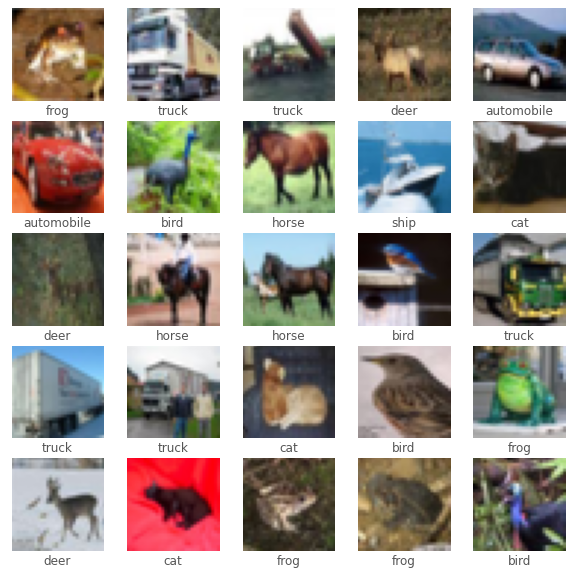

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to our first layer.

A neural network architecture has to be precisely defined - how many neurons are there in each layer, and how are they organized? This needs to reflect the expected input. Now in this case we will work with images of 32 by 32 pixels, plus 3 color channels (RGB). Since there are three colours we get the shape (32, 32, 3).

Below is code to build a neural network, by adding one layer at a time using `model.add`. **Ex.XX. Specify the `input_shape` in the input layer below to be of correct dimensions**.



In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

![img](assets/MaxpoolSample2_FirelordPhoenix_CCBYSA4.0.png)

Let's display the architecture of our model so far.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top
To complete our model, you will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a softmax activation.

In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Here's the complete architecture of our model.

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576) before going through two Dense layers.

### Compile and train the model

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.5100 - accuracy: 0.4517 - val_loss: 1.2194 - val_accuracy: 0.5578
Epoch 2/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.1427 - accuracy: 0.5964 - val_loss: 1.0577 - val_accuracy: 0.6269
Epoch 3/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.9942 - accuracy: 0.6510 - val_loss: 0.9901 - val_accuracy: 0.6495
Epoch 4/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.9051 - accuracy: 0.6823 - val_loss: 0.9018 - val_accuracy: 0.6816
Epoch 5/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.8349 - accuracy: 0.7070 - val_loss: 0.8990 - val_accuracy: 0.6850
Epoch 6/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.7801 - accuracy: 0.7271 - val_loss: 0.9070 - val_accuracy: 0.6858
Epoch 7/10
50000/50000 [==============================] 

KeyboardInterrupt: 

### Evaluate the model

10000/1 - 2s - loss: 1.0691 - accuracy: 0.6867


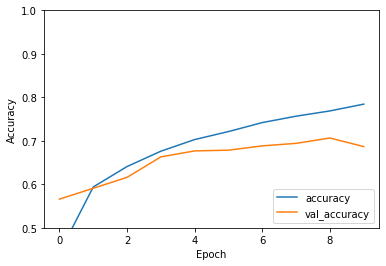

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [16]:
print(test_acc)

0.6867


Our simple CNN has achieved a test accuracy of about 70%. Not bad for a few lines of code! For another CNN style, see an example using the Keras subclassing API and a `tf.GradientTape` [here](https://www.tensorflow.org/tutorials/quickstart/advanced).

Now that you have become familiarised with CNNs in Keras for classification, let's look at another important application of CNNs.

# Image segmentation

The pinacle of deep learning in radiology is automatic segmentation. This has particular relevance to precise localization of tumours for surgery, but also is needed to quantify size for long term monitoring etc. Segmentation is also interesting for a number of scientific endeavors, such as measuring the size of different brain regions. The techniques learned here 


##### Copyright 2019 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [17]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image segmentation

This tutorial focuses on the task of image segmentation, using a modified [U-Net](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/).

## What is image segmentation?
So far you have seen image classification, where the task of the network is to assign a label or class to an input image. However, suppose you want to know where an object is located in the image, the shape of that object, which pixel belongs to which object, etc. In this case you will want to segment the image, i.e., each pixel of the image is given a label. Thus, the task of image segmentation is to train a neural network to output a pixel-wise mask of the image. This helps in understanding the image at a much lower level, i.e., the pixel level. Image segmentation has many applications in medical imaging, self-driving cars and satellite imaging to name a few.

The dataset that will be used for this tutorial is the [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/), created by Parkhi *et al*. The dataset consists of images, their corresponding labels, and pixel-wise masks. The masks are basically labels for each pixel. Each pixel is given one of three categories :

*   Class 1 : Pixel belonging to the pet.
*   Class 2 : Pixel bordering the pet.
*   Class 3 : None of the above/ Surrounding pixel.

In [ ]:
import tensorflow as tf
import sys

In [5]:
# Uncomment if you get an import error on tensorflow_datasets
#!{sys.executable} -m pip install tensorflow_datasets

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
#tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

## Download the Oxford-IIIT Pets dataset

The dataset is already included in TensorFlow datasets, all that is needed to do is download it. The segmentation masks are included in version 3.0.0, which is why this particular version is used.

In [7]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

The following code performs a simple **augmentation** of flipping an image, a trick to effectively increase the sample size. In addition, the image is normalized to [0,1], which is an important processing step for neural networks. Finally, as mentioned above the pixels in the segmentation mask are labeled either {1, 2, 3}. For the sake of convinience, let's subtract 1 from the segmentation mask, resulting in labels that are : {0, 1, 2}.

In [8]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [9]:
@tf.function # this line of code is a decorator, and expands the functionality of load_image_train.
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
  
    # do a flip with 0.5 probability
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)
  
    input_image, input_mask = normalize(input_image, input_mask)
  
    return input_image, input_mask

In [10]:
def load_image_test(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
  
    input_image, input_mask = normalize(input_image, input_mask)
  
    return input_image, input_mask

The dataset already contains the required splits of test and train and so let's continue to use the same split.

In [11]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [13]:
# apply (map) the loading functions to each image in the dataset
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

In [14]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

Let's take a look at an image example and it's correponding mask from the dataset.

In [15]:
def display(display_list):
    plt.figure(figsize=(15, 15))
  
    title = ['Input Image', 'True Mask', 'Predicted Mask']
  
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

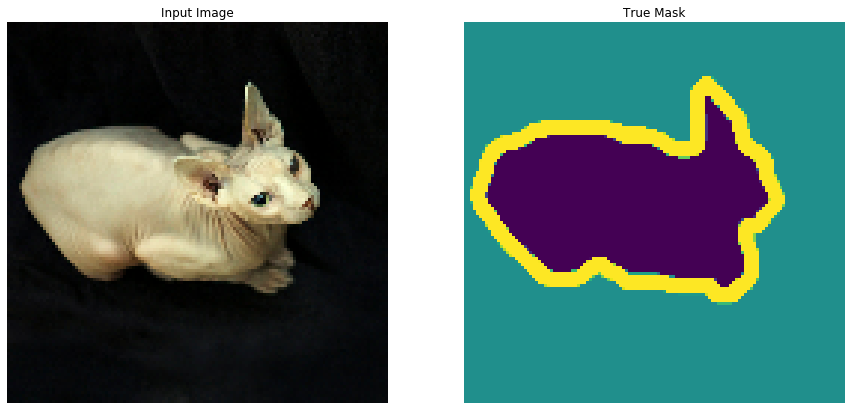

In [66]:
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

## Define the model
The model being used here is a modified U-Net. A U-Net consists of an encoder (downsampler) and decoder (upsampler). In-order to learn robust features, and reduce the number of trainable parameters, a pretrained model can be used as the encoder. Thus, the encoder for this task will be a pretrained MobileNetV2 model, whose intermediate outputs will be used, and the decoder will be the upsample block already implemented in TensorFlow Examples in the [Pix2pix tutorial](https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py). 

The reason to output three channels is because there are three possible labels for each pixel. Think of this as multi-classification where each pixel is being classified into three classes.

In [17]:
OUTPUT_CHANNELS = 3

As mentioned, the encoder will be a pretrained MobileNetV2 model which is prepared and ready to use in [tf.keras.applications](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/applications). The encoder consists of specific outputs from intermediate layers in the model. Note that the encoder will not be trained during the training process.

In [18]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

The decoder/upsampler is simply a series of upsample blocks implemented in TensorFlow examples.

In [19]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [20]:
def unet_model(output_channels):
  
    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same', activation='softmax')  #64x64 -> 128x128
  
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs
  
    # Downsampling through the model
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])
  
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])
  
    x = last(x)
  
    return tf.keras.Model(inputs=inputs, outputs=x)

## Train the model
Now, all that is left to do is to compile and train the model. The loss being used here is losses.sparse_categorical_crossentropy. The reason to use this loss function is because the network is trying to assign each pixel a label, just like multi-class prediction. In the true segmentation mask, each pixel has either a {0,1,2}. The network here is outputting three channels. Essentially, each channel is trying to learn to predict a class, and losses.sparse_categorical_crossentropy is the recommended loss for such a scenario. Using the output of the network, the label assigned to the pixel is the channel with the highest value. This is what the create_mask function is doing.

In [21]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Have a quick look at the resulting model architecture:

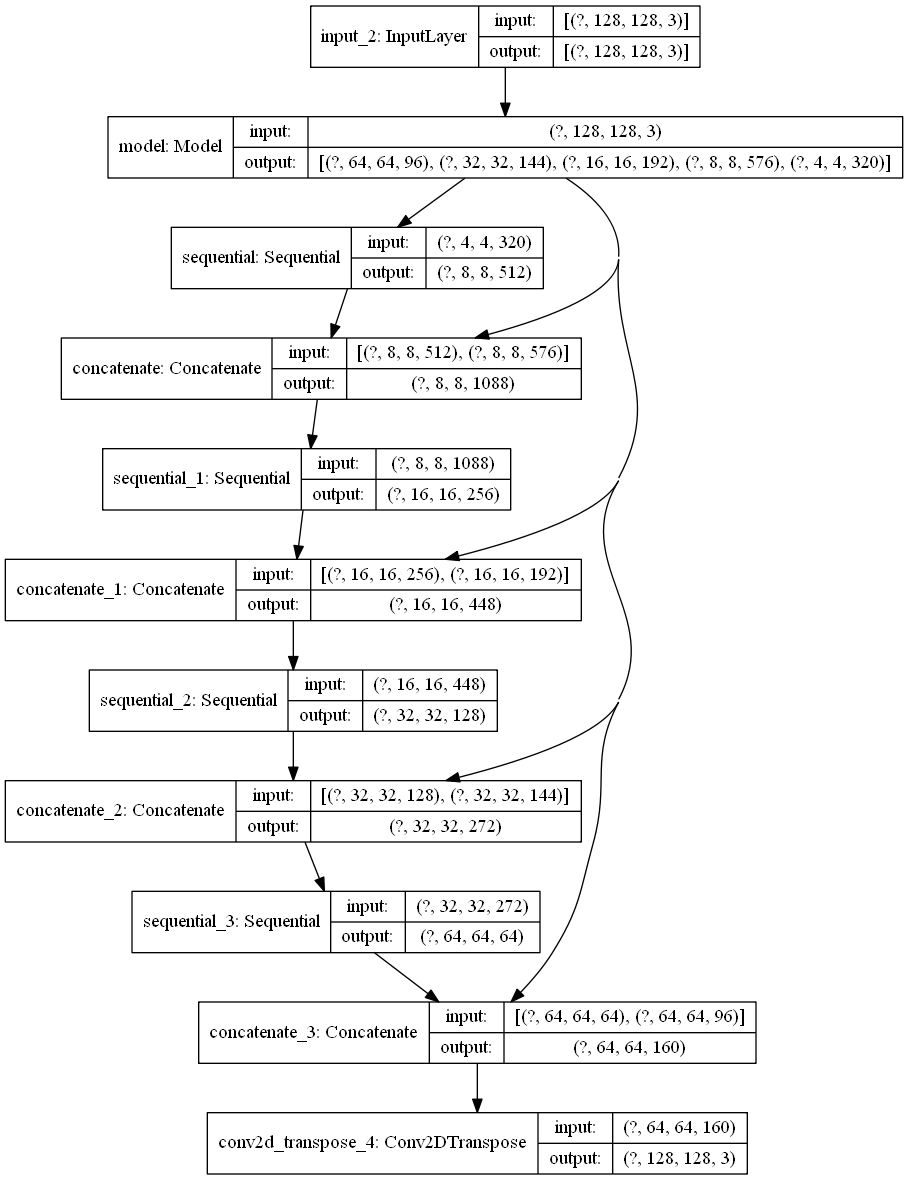

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True)

Let's try out the model to see what it predicts before training.

In [23]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [24]:
def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                create_mask(model.predict(sample_image[tf.newaxis, ...]))])

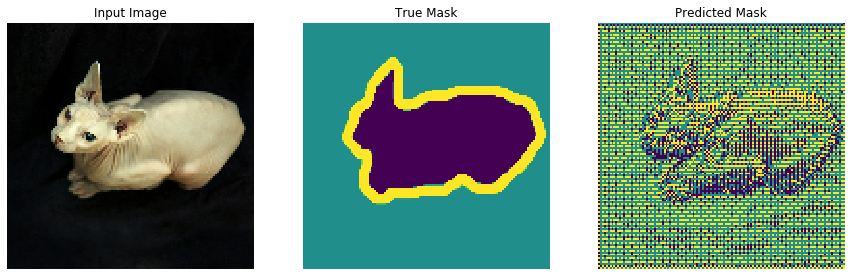

In [25]:
show_predictions()

Let's observe how the model improves while it is training. To accomplish this task, a callback function is defined below. 

In [26]:
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

Usually, we would run the below code for 20 epochs, but as long as you are using your CPU as opposed to a GPU (as intended for CBM101), we have reduced it to just a single epoch. However, in a research setting you would use a GPU, and the code would run in seconds. As a consequence, the final model will not be very accurate. However, it will be far from useless, and you can achieve an accuracy just short of 0.9 if you run all 20 epochs.

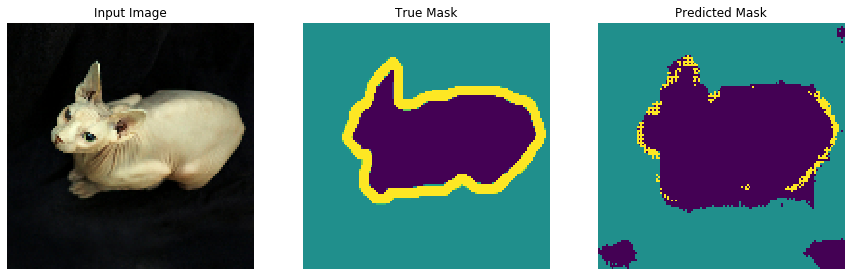


Sample Prediction after epoch 1

57/57 [==============================] - 1339s 23s/step - loss: 0.4986 - accuracy: 0.7977 - val_loss: 0.6365 - val_accuracy: 0.7995


In [27]:
#EPOCHS = 20
EPOCHS = 1
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

In [29]:
#
#loss = model_history.history['loss']
#val_loss = model_history.history['val_loss']
#
#epochs = range(EPOCHS)
#
#plt.figure()
#plt.plot(epochs, loss, 'r', label='Training loss')
#plt.plot(epochs, val_loss, 'bo', label='Validation loss')
#plt.title('Training and Validation Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss Value')
#plt.ylim([0, 1])
#plt.legend()
#plt.show()

## Make predictions

Let's make some predictions. In the interest of saving time, the number of epochs was kept small, but you may set this higher to achieve more accurate results.

Run the below cell to predict a random sample from the test set. You can run it multiple times to get an idea of how well the model works.

Processing...


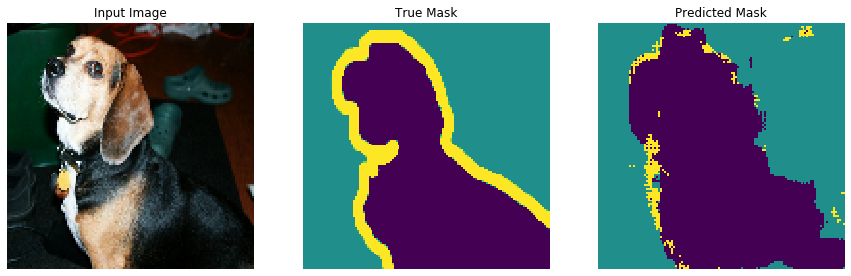

In [108]:
for image, mask in test.cache().shuffle(1000).batch(BATCH_SIZE).take(1):
    print("Processing...")
    sample_image, sample_mask = image, mask
    pred_mask = model.predict(sample_image)
    display([image[0], mask[0], create_mask(pred_mask)])